In [1]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [2]:
steam_df = pd.read_csv(".//112_UCR_Anomaly_BIDMC1_2500_5400_5600.csv")
steam_df.head()

,-3.45E+03
0,-3990.0
1,-4530.0
2,-5070.0
3,-5470.0
4,-5880.0


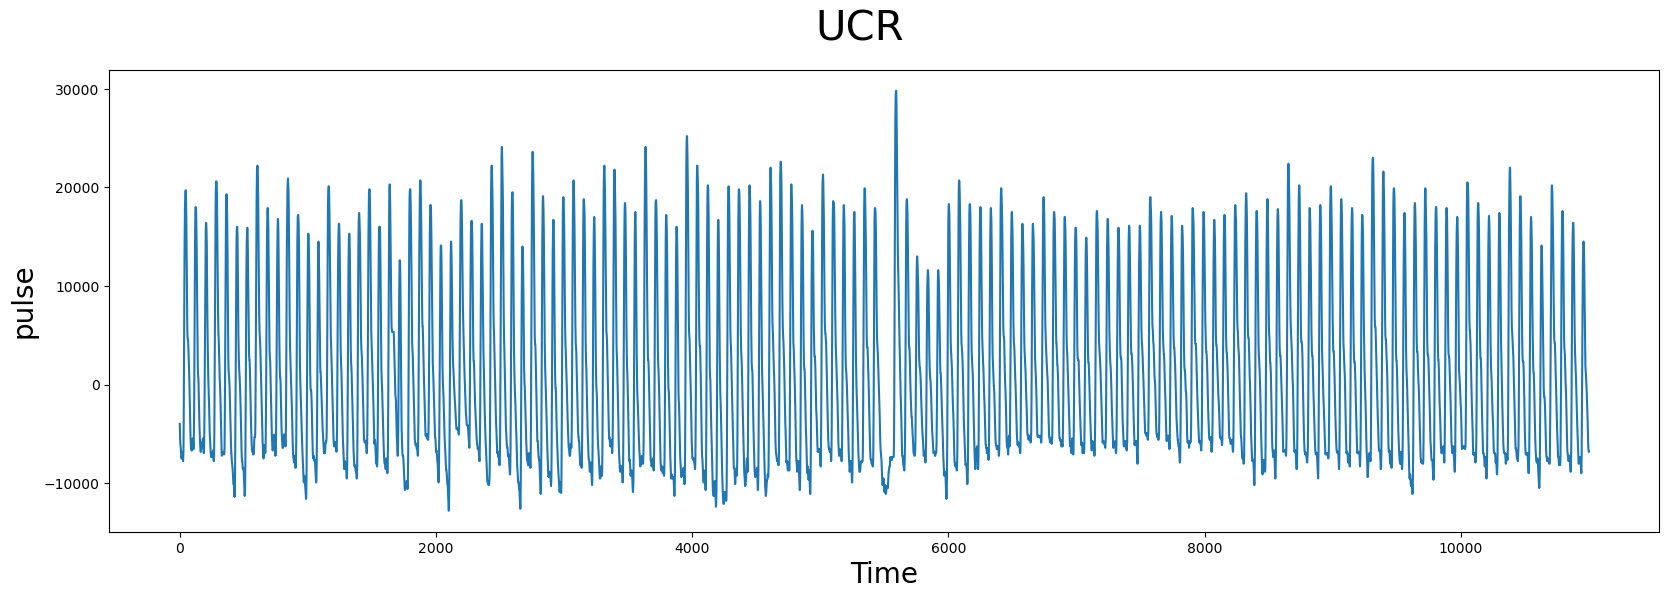

10999


In [3]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
plt.suptitle('UCR', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('pulse', fontsize='20')
steam_df = pd.DataFrame(steam_df) 

steam_df.insert(0, 'id', range(1, 1 + len(steam_df)))
plt.plot(steam_df.values[:,1:2])
plt.show()
print(len(steam_df))

In [4]:
steam_df.head()

,id,-3.45E+03
0,1,-3990.0
1,2,-4530.0
2,3,-5070.0
3,4,-5470.0
4,5,-5880.0


In [5]:
import numpy as np
import scipy.signal

from matplotlib import pyplot as plt
L=steam_df['-3.45E+03'].values
L2=L
#L *= scipy.signal.windows.hann(len(L))

L = np.round(L, 1)
# Remove DC component
L -= np.mean(L)
# Window signal
L *= scipy.signal.windows.hann(len(L))

fft = np.fft.rfft(L, norm="ortho")

#plt.plot(L)
#plt.figure()
#plt.plot(abs(fft))
def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")


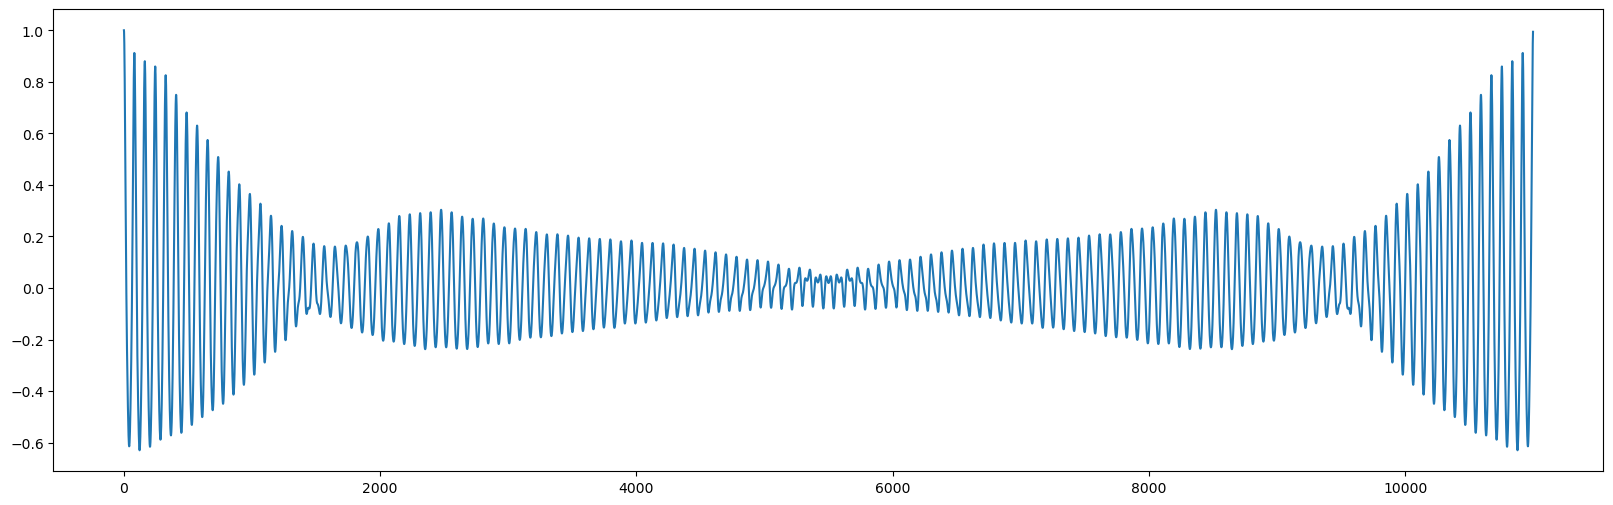

In [6]:
Ltrunk=1
multipleofperiod= np.argsort(selfconvol[1:len(L2)//4])
Ltrunk=L2[0:(len(L2//len(multipleofperiod))*len(multipleofperiod))]

fft = np.fft.rfft(Ltrunk, norm="ortho")
selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
plt.savefig('second.jpg')
plt.show()


#get ranges for first min, second max
fmax=np.max(selfconvol[1:len(Ltrunk)//4])
fmin=np.min(selfconvol[1:len(Ltrunk)//4])
xstartmin=1
while selfconvol[xstartmin]>fmin+0.1*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1
    
xstartmax=xstartmin
while selfconvol[xstartmax]<fmin+0.1*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
    xstartmax=xstartmax+1

In [7]:

period=np.argmax(selfconvol[xstartmin:xstartmax])+xstartmax

print ("The period is ",period)


The period is  51


In [8]:
steam_df2 = pd.read_csv(".//12_UCR_Anomaly_BIDMC1_2500_5400_5600.csv",sep=';')

print(len(steam_df2["1"]))
steam_df2.head()

1048575


,1,-3.45E+03
0,2.0,-3990.0
1,3.0,-4530.0
2,4.0,-5070.0
3,5.0,-5470.0
4,6.0,-5880.0


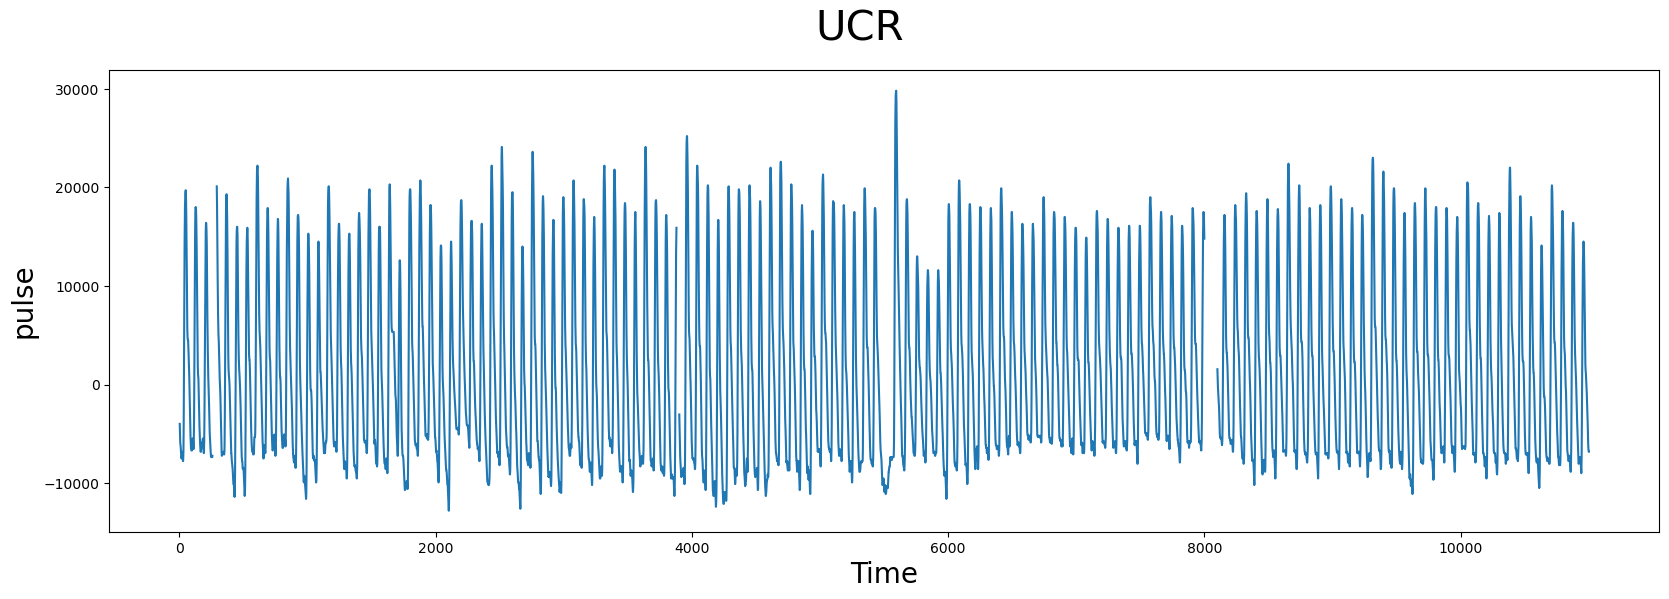

In [9]:
import matplotlib.pyplot as plt
from importlib import reload
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')
#plt=reload(plt)
x = steam_df2["1"]
plt.suptitle('UCR', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('pulse', fontsize='20')
#steam_df2 = pd.DataFrame(steam_df2) 

#steam_df2.insert(0, 'id', range(0,  len(steam_df2)))
plt.plot(x,steam_df2["-3.45E+03"])
plt.show()


KeyboardInterrupt: 

In [ ]:
from itertools import groupby
from operator import itemgetter
xd=(np.where(steam_df2["-3.45E+03"].isna()) )
xd=np.array(xd).tolist()
n=0
groups = []
for k, g in groupby(enumerate(xd.pop(0)), lambda x: x[0]-x[1]):
     
     groups.append(list(map(itemgetter(1), g)))
     print(len(groups[n]),groups[n])
     n=n+1


In [ ]:
steam_df2.interpolate(method='linear', limit_direction='forward', axis=0)

In [ ]:
plt=reload(plt)
plt.suptitle('URC Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('pulse', fontsize='20')


plt.plot(x,steam_df2['-3.45E+03'].interpolate(method='linear', limit_direction='forward', axis=0),'r-')
plt.plot(steam_df['-3.45E+03'].values,'b-')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
stm=steam_df2['-3.45E+03'].interpolate(method='linear', limit_direction='forward', axis=0)
#calculate RMSE
sqrt(mean_squared_error(steam_df['-3.45E+03'][7998:8098].values, stm[7998:8098].values, squared=True)/100)
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
stm=steam_df2['-3.45E+03'].interpolate(method='linear', limit_direction='forward', axis=0)
#calculate RMSE
sqrt(mean_squared_error(steam_df['-3.45E+03'][256:288].values, stm[256:288].values, squared=True)/100)
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][7998:8098].values, stm[7998:8098].values)
  
# display
print("Mean absolute error : " + str(error))

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][256:288].values, stm[256:288].values)
  
# display
print("Mean absolute error : " + str(error))

In [ ]:
tau, p_value=(scipy.stats.kendalltau(steam_df['-3.45E+03'][7998:8098].values, stm[7998:8098].values)
  )
print(tau,p_value)

In [ ]:
tau, p_value=(scipy.stats.kendalltau(steam_df['-3.45E+03'][256:288].values, stm[256:288].values)
  )
print(tau,p_value)

In [ ]:
plt=reload(plt)
plt.suptitle('URC Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Pulses', fontsize='20')
plt.plot(x,steam_df2['-3.45E+03'].interpolate(method='polynomial', order=3),'r')
plt.plot(steam_df['-3.45E+03'].values,'b')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
stm2=steam_df2['-3.45E+03'].interpolate(method='polynomial', order=3)

#calculate RMSE
sqrt(mean_squared_error(steam_df['-3.45E+03'][7998:8098].values,stm2[7998:8098].values, squared=True)/100)
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][7998:8098].values,stm2[7998:8098].values)
  
# display
print("Mean absolute error : " + str(error))

In [ ]:
tau, p_value=(scipy.stats.kendalltau(steam_df['-3.45E+03'][7998:8098].values,stm2[7998:8098].values)
  )
print(tau,p_value)

In [ ]:
m=20
mp = stumpy.stump(steam_df['-3.45E+03'][0:3950], m,steam_df2['-3.45E+03'][7978:7998],ignore_trivial = False)

In [ ]:
motif_idx = np.argsort(mp[:,0])[0:5]

print(mp[motif_idx[0:5],0])
#motif_idx
#motif_idx2
#p
print(f"The motif is located at index {motif_idx}")
motif_idx = np.argsort(mp[:, 0])[0]
discord_idx=motif_idx
print(f"The motif is located at index {motif_idx}")

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
rect = Rectangle((2741, 0), 50, 30000, facecolor='red')
axs[1].add_patch(rect)
axs[1].plot(x,steam_df2['-3.45E+03'].values)
axs[1].set_ylabel('-3.45E+03', fontsize='20')
rect = Rectangle((7998, 0), 50, 30000, facecolor='lightgrey')
axs[1].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')


In [ ]:
m=200
#mp = stumpy.stump(steam_df['steam flow'][0:3950], m,steam_df2['steam flow'][3587:3987],ignore_trivial = False)

In [ ]:
import scipy.stats

K=0
x=0
z=0
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=2)
    return v
for K in range(6000):
    
    tau, p_value=(scipy.stats.kendalltau(steam_df2['-3.45E+03'][8099:8119],steam_df['-3.45E+03'][K:K+20]))
    if tau>x:
        x=tau
        z=(K)
   
print(x,z)

In [ ]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
rect = Rectangle((65, 0), m, 30000, facecolor='red')
axs[1].add_patch(rect)
axs[1].plot(steam_df2['1'].values,steam_df2['-3.45E+03'].values)
axs[1].set_ylabel('-3.45E+03', fontsize='20')
rect = Rectangle((8099, 0), m, 30000, facecolor='lightgrey')
axs[1].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')

In [ ]:
import scipy.stats

K=0
x=0
d=0
z=0
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=2)
    return v
for K in range(50):
    
    x=(steam_df2['-3.45E+03'][2740+K:2741+K].values)#-steam_df2['steam flow'][1587+K:1588+K].values)
    d=(steam_df2['-3.45E+03'][64-K:65-K].values)
    steam_df2['-3.45E+03'][7997+K:7998+K]=x
    steam_df2['-3.45E+03'][8097-K:8098-K]=d
    
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Novelty) Discovery', fontsize='30')
axs[1].plot(steam_df['-3.45E+03'].values,'r')

axs[1].plot(steam_df2['1'].values,steam_df2['-3.45E+03'].values)
axs[1].set_ylabel('-3.45E+03', fontsize='20')

axs[1].set_xlabel('Time', fontsize ='20')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
sqrt(mean_squared_error(steam_df['-3.45E+03'][7998:8098].values, steam_df2['-3.45E+03'][7998:8098].values, squared=True)/100)
#from sklearn.metrics import mean_squared_error
#rmse = mean_squared_error(steam_df['steam flow'][3987:4116].values, steam_df2['steam flow'][3987:4116].values , squared=False)
#print(rmse)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
  

error = mae(steam_df['-3.45E+03'][7998:8098].values, steam_df2['-3.45E+03'][7998:8098].values)
  
# display
print("Mean absolute error : " + str(error))

In [ ]:
tau, p_value=(scipy.stats.kendalltau(steam_df2['-3.45E+03'][7998:8098],steam_df['-3.45E+03'][7998:8098]))
print(tau,p_value)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputer.fit(steam_df2)
Xtrans = imputer.transform(steam_df2)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))